In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

3

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49652 stdev: 0.06160
Best fitness: 0.66852 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.164
Mean genetic distance 2.837, standard deviation 0.474
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.827 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52982 stdev: 0.07073
Best fitness: 0.71367 - size: (3, 15) - species 1 - id 331
Average adjusted fitness: 0.156
Mean genetic distance 2.946, standard deviation 0.479
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.373 sec (6.100 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55123 stdev: 0.07854
Best fitness: 0.71367 - size: (3, 15) - species 1 - id 331
Average adjusted fitness: 0.189
Mean genetic distance 2.986, standard deviation 0.462
Population of 201 members in 29 species
Total extinction

Population's average fitness: 0.63842 stdev: 0.08782
Best fitness: 0.78541 - size: (7, 23) - species 24 - id 3422
Average adjusted fitness: 0.189
Mean genetic distance 3.145, standard deviation 0.488
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 7.553 sec (8.006 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62264 stdev: 0.10003
Best fitness: 0.78541 - size: (7, 23) - species 24 - id 3422
Average adjusted fitness: 0.338
Mean genetic distance 3.163, standard deviation 0.484
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.979 sec (7.830 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63172 stdev: 0.09337
Best fitness: 0.78541 - size: (7, 23) - species 24 - id 3422
Average adjusted fitness: 0.224
Mean genetic distance 3.164, standard deviation 0.493
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.958 sec (7.767 average)

 ******

Mean genetic distance 3.315, standard deviation 0.567
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 8.672 sec (9.024 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64578 stdev: 0.09233
Best fitness: 0.80210 - size: (9, 29) - species 24 - id 7046
Average adjusted fitness: 0.240
Mean genetic distance 3.303, standard deviation 0.579
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 9.013 sec (9.079 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65872 stdev: 0.08851
Best fitness: 0.80210 - size: (9, 29) - species 24 - id 7046
Average adjusted fitness: 0.175
Mean genetic distance 3.359, standard deviation 0.544
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.767 sec (9.104 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64240 stdev: 0.09790
Best fitness: 0.80210 - size: (9, 29) - species 24 - id 7046


Mean genetic distance 3.404, standard deviation 0.564
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 10.988 sec (10.503 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65434 stdev: 0.09928
Best fitness: 0.81014 - size: (11, 34) - species 24 - id 11074
Average adjusted fitness: 0.234
Mean genetic distance 3.383, standard deviation 0.555
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 11.595 sec (10.503 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66791 stdev: 0.08837
Best fitness: 0.81014 - size: (11, 34) - species 47 - id 11074
Average adjusted fitness: 0.237
Mean genetic distance 3.366, standard deviation 0.572
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 11.477 sec (10.596 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.65849 stdev: 0.09785
Best fitness: 0.81014 - size: (11, 34) - species 24

Population's average fitness: 0.66809 stdev: 0.09746
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.207
Mean genetic distance 3.309, standard deviation 0.660
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 10.747 sec (11.302 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66546 stdev: 0.09976
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.283
Mean genetic distance 3.345, standard deviation 0.637
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.826 sec (11.257 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65544 stdev: 0.09832
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.214
Mean genetic distance 3.365, standard deviation 0.624
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.893 sec (11.242 avera

Population's average fitness: 0.64675 stdev: 0.10170
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.209
Mean genetic distance 3.257, standard deviation 0.683
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 11.839 sec (11.691 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66229 stdev: 0.10087
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.266
Mean genetic distance 3.261, standard deviation 0.675
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.527 sec (11.747 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.64380 stdev: 0.10052
Best fitness: 0.82004 - size: (10, 32) - species 47 - id 13538
Average adjusted fitness: 0.256
Mean genetic distance 3.171, standard deviation 0.709
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 11.826 sec (11.850 ave

Population's average fitness: 0.63684 stdev: 0.10213
Best fitness: 0.82066 - size: (11, 33) - species 47 - id 22508
Average adjusted fitness: 0.280
Mean genetic distance 3.104, standard deviation 0.618
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 14.127 sec (12.579 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.63550 stdev: 0.09763
Best fitness: 0.82066 - size: (11, 33) - species 47 - id 22508
Average adjusted fitness: 0.235
Mean genetic distance 3.109, standard deviation 0.614
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 11.862 sec (12.302 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.63964 stdev: 0.10062
Best fitness: 0.82066 - size: (11, 33) - species 47 - id 22508
Average adjusted fitness: 0.266
Mean genetic distance 3.141, standard deviation 0.616
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 16.021 sec (12.672 ave


Population's average fitness: 0.71235 stdev: 0.18283
Best fitness: 0.88126 - size: (4, 17) - species 22 - id 818
Average adjusted fitness: 0.514
Mean genetic distance 3.092, standard deviation 0.513
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 7.028 sec (7.031 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71687 stdev: 0.18298
Best fitness: 0.88126 - size: (4, 17) - species 22 - id 818
Average adjusted fitness: 0.521
Mean genetic distance 3.109, standard deviation 0.528
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 6.678 sec (7.017 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72526 stdev: 0.17639
Best fitness: 0.88126 - size: (4, 17) - species 22 - id 818
Average adjusted fitness: 0.530
Mean genetic distance 3.150, standard deviation 0.516
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.996 sec (7.008 average)

 ****** R

Population's average fitness: 0.74571 stdev: 0.17006
Best fitness: 0.88930 - size: (7, 23) - species 34 - id 6070
Average adjusted fitness: 0.573
Mean genetic distance 3.348, standard deviation 0.558
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.668 sec (8.543 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.74741 stdev: 0.16186
Best fitness: 0.88930 - size: (7, 23) - species 34 - id 6070
Average adjusted fitness: 0.549
Mean genetic distance 3.353, standard deviation 0.556
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 9.014 sec (8.624 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.73727 stdev: 0.17934
Best fitness: 0.88930 - size: (7, 23) - species 34 - id 6070
Average adjusted fitness: 0.529
Mean genetic distance 3.349, standard deviation 0.576
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 8.919 sec (8.698 average)

 ******

Population's average fitness: 0.71456 stdev: 0.20609
Best fitness: 0.90043 - size: (11, 35) - species 17 - id 8517
Average adjusted fitness: 0.519
Mean genetic distance 3.327, standard deviation 0.598
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 12.710 sec (11.573 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.71400 stdev: 0.20101
Best fitness: 0.90043 - size: (11, 35) - species 17 - id 8517
Average adjusted fitness: 0.549
Mean genetic distance 3.320, standard deviation 0.605
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 11.120 sec (11.539 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.70960 stdev: 0.21110
Best fitness: 0.90043 - size: (11, 35) - species 17 - id 8517
Average adjusted fitness: 0.519
Mean genetic distance 3.316, standard deviation 0.596
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.464 sec (11.589 average)

Population's average fitness: 0.67340 stdev: 0.23974
Best fitness: 0.90785 - size: (12, 37) - species 52 - id 12910
Average adjusted fitness: 0.471
Mean genetic distance 3.223, standard deviation 0.638
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.611 sec (12.890 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.70371 stdev: 0.21228
Best fitness: 0.91218 - size: (12, 37) - species 17 - id 14854
Average adjusted fitness: 0.503
Mean genetic distance 3.233, standard deviation 0.605
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.325 sec (13.029 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.73278 stdev: 0.17686
Best fitness: 0.91218 - size: (12, 37) - species 17 - id 14854
Average adjusted fitness: 0.534
Mean genetic distance 3.201, standard deviation 0.630
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 13.103 sec (13.094 avera

Population's average fitness: 0.67694 stdev: 0.22867
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.476
Mean genetic distance 3.159, standard deviation 0.627
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.551 sec (15.125 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.69373 stdev: 0.21767
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.493
Mean genetic distance 3.131, standard deviation 0.628
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 15.330 sec (15.135 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.70627 stdev: 0.20195
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.506
Mean genetic distance 3.123, standard deviation 0.643
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.042 sec (15.144 ave

Population's average fitness: 0.69745 stdev: 0.21545
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.490
Mean genetic distance 2.997, standard deviation 0.566
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 16.078 sec (16.804 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68841 stdev: 0.22750
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.494
Mean genetic distance 2.954, standard deviation 0.533
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 16.555 sec (16.840 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69531 stdev: 0.22550
Best fitness: 0.91280 - size: (16, 39) - species 52 - id 15354
Average adjusted fitness: 0.498
Mean genetic distance 2.898, standard deviation 0.508
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.578 sec (16.799 ave

Population's average fitness: 0.60963 stdev: 0.09812
Best fitness: 0.80458 - size: (3, 14) - species 36 - id 653
Average adjusted fitness: 0.286
Mean genetic distance 3.079, standard deviation 0.485
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.832 sec (6.735 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61500 stdev: 0.09579
Best fitness: 0.80458 - size: (3, 14) - species 36 - id 653
Average adjusted fitness: 0.226
Mean genetic distance 3.089, standard deviation 0.488
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.816 sec (6.766 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61628 stdev: 0.09622
Best fitness: 0.80458 - size: (3, 14) - species 36 - id 653
Average adjusted fitness: 0.232
Mean genetic distance 3.075, standard deviation 0.485
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 6.737 sec (6.752 average)

 ****** Ru

Population of 195 members in 21 species
Total extinctions: 0
Generation time: 9.180 sec (8.568 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64310 stdev: 0.10181
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590
Average adjusted fitness: 0.276
Mean genetic distance 3.190, standard deviation 0.556
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 9.097 sec (8.661 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64139 stdev: 0.10423
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590
Average adjusted fitness: 0.285
Mean genetic distance 3.186, standard deviation 0.554
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.414 sec (8.689 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64506 stdev: 0.10878
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590
Average adjusted fitness: 0.320
Mean genetic distance 

Mean genetic distance 3.180, standard deviation 0.583
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.863 sec (9.050 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64599 stdev: 0.10334
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590
Average adjusted fitness: 0.244
Mean genetic distance 3.188, standard deviation 0.575
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.212 sec (9.111 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.65512 stdev: 0.09635
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590
Average adjusted fitness: 0.251
Mean genetic distance 3.169, standard deviation 0.585
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.610 sec (9.169 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65029 stdev: 0.10520
Best fitness: 0.80952 - size: (6, 22) - species 38 - id 3590


Mean genetic distance 3.054, standard deviation 0.645
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 10.385 sec (10.777 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.66200 stdev: 0.10701
Best fitness: 0.81138 - size: (11, 29) - species 50 - id 12426
Average adjusted fitness: 0.349
Mean genetic distance 3.053, standard deviation 0.648
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 10.548 sec (10.874 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64068 stdev: 0.11958
Best fitness: 0.81138 - size: (11, 29) - species 50 - id 12426
Average adjusted fitness: 0.335
Mean genetic distance 3.001, standard deviation 0.640
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 10.421 sec (10.943 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.65211 stdev: 0.11457
Best fitness: 0.81138 - size: (11, 29) - species 50

Population's average fitness: 0.65797 stdev: 0.10857
Best fitness: 0.81138 - size: (11, 29) - species 50 - id 12426
Average adjusted fitness: 0.251
Mean genetic distance 2.902, standard deviation 0.512
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.392 sec (10.112 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65970 stdev: 0.10020
Best fitness: 0.81138 - size: (11, 29) - species 50 - id 12426
Average adjusted fitness: 0.296
Mean genetic distance 2.957, standard deviation 0.483
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 9.788 sec (10.123 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64796 stdev: 0.10985
Best fitness: 0.81138 - size: (11, 29) - species 50 - id 12426
Average adjusted fitness: 0.270
Mean genetic distance 2.990, standard deviation 0.487
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 9.741 sec (10.126 averag

Population's average fitness: 0.67172 stdev: 0.10424
Best fitness: 0.81571 - size: (10, 29) - species 73 - id 21019
Average adjusted fitness: 0.270
Mean genetic distance 3.025, standard deviation 0.506
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.323 sec (10.088 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.66395 stdev: 0.10950
Best fitness: 0.81571 - size: (10, 29) - species 73 - id 21019
Average adjusted fitness: 0.351
Mean genetic distance 3.041, standard deviation 0.521
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 9.888 sec (10.043 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66257 stdev: 0.10842
Best fitness: 0.81571 - size: (10, 29) - species 73 - id 21019
Average adjusted fitness: 0.280
Mean genetic distance 3.031, standard deviation 0.502
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 10.095 sec (10.004 aver

Population's average fitness: 0.57501 stdev: 0.09047
Best fitness: 0.73098 - size: (3, 16) - species 34 - id 522
Average adjusted fitness: 0.233
Mean genetic distance 3.176, standard deviation 0.520
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.012 sec (7.115 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58696 stdev: 0.09302
Best fitness: 0.74583 - size: (3, 13) - species 8 - id 1232
Average adjusted fitness: 0.223
Mean genetic distance 3.151, standard deviation 0.511
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.512 sec (7.039 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58029 stdev: 0.09847
Best fitness: 0.74583 - size: (3, 13) - species 8 - id 1232
Average adjusted fitness: 0.255
Mean genetic distance 3.187, standard deviation 0.501
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.965 sec (7.031 average)

 ****** Runn

Population's average fitness: 0.62417 stdev: 0.10373
Best fitness: 0.78541 - size: (7, 22) - species 22 - id 3712
Average adjusted fitness: 0.287
Mean genetic distance 3.365, standard deviation 0.500
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.176 sec (7.748 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62060 stdev: 0.10135
Best fitness: 0.78541 - size: (7, 22) - species 22 - id 3712
Average adjusted fitness: 0.310
Mean genetic distance 3.361, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.219 sec (7.829 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62262 stdev: 0.10204
Best fitness: 0.78541 - size: (7, 22) - species 22 - id 3712
Average adjusted fitness: 0.281
Mean genetic distance 3.347, standard deviation 0.498
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.075 sec (7.896 average)

 ******

Population's average fitness: 0.64188 stdev: 0.09809
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.243
Mean genetic distance 3.159, standard deviation 0.562
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 9.871 sec (10.539 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62296 stdev: 0.11171
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.280
Mean genetic distance 3.182, standard deviation 0.562
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.503 sec (10.721 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64203 stdev: 0.10166
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.254
Mean genetic distance 3.205, standard deviation 0.568
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.014 sec (10.742 average)

 **

Population's average fitness: 0.62115 stdev: 0.11400
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.308
Mean genetic distance 3.159, standard deviation 0.575
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.679 sec (9.826 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.62918 stdev: 0.10323
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.257
Mean genetic distance 3.176, standard deviation 0.568
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.879 sec (9.799 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.61661 stdev: 0.10073
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.232
Mean genetic distance 3.179, standard deviation 0.589
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.318 sec (9.656 average)

 ******

Population's average fitness: 0.60757 stdev: 0.11129
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.257
Mean genetic distance 3.224, standard deviation 0.619
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 12.834 sec (10.811 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.60744 stdev: 0.10922
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.236
Mean genetic distance 3.206, standard deviation 0.611
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 13.504 sec (11.132 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.61513 stdev: 0.10741
Best fitness: 0.80458 - size: (8, 24) - species 22 - id 4802
Average adjusted fitness: 0.220
Mean genetic distance 3.196, standard deviation 0.621
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.018 sec (11.256 average)


Population's average fitness: 0.63998 stdev: 0.10681
Best fitness: 0.81571 - size: (11, 31) - species 22 - id 18510
Average adjusted fitness: 0.242
Mean genetic distance 3.121, standard deviation 0.585
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.253 sec (12.543 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.64274 stdev: 0.10611
Best fitness: 0.81571 - size: (11, 31) - species 22 - id 18510
Average adjusted fitness: 0.245
Mean genetic distance 3.159, standard deviation 0.569
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.893 sec (12.796 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.64114 stdev: 0.10861
Best fitness: 0.81571 - size: (11, 31) - species 22 - id 18510
Average adjusted fitness: 0.298
Mean genetic distance 3.145, standard deviation 0.571
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.115 sec (13.176 ave

Population's average fitness: 0.49675 stdev: 0.05973
Best fitness: 0.66172 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.187
Mean genetic distance 2.879, standard deviation 0.511
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 6.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53015 stdev: 0.06800
Best fitness: 0.70192 - size: (3, 15) - species 9 - id 240
Average adjusted fitness: 0.217
Mean genetic distance 2.995, standard deviation 0.509
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.994 sec (6.012 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55553 stdev: 0.06600
Best fitness: 0.70377 - size: (3, 14) - species 27 - id 533
Average adjusted fitness: 0.217
Mean genetic distance 3.072, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 5.955 sec (5.993 average)

 ****** Running generation 3 **

Population's average fitness: 0.61017 stdev: 0.09073
Best fitness: 0.77675 - size: (5, 21) - species 28 - id 3205
Average adjusted fitness: 0.256
Mean genetic distance 3.247, standard deviation 0.553
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 8.919 sec (7.643 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62465 stdev: 0.08463
Best fitness: 0.77675 - size: (5, 21) - species 28 - id 3205
Average adjusted fitness: 0.247
Mean genetic distance 3.254, standard deviation 0.547
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.321 sec (7.652 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61733 stdev: 0.08730
Best fitness: 0.77675 - size: (5, 21) - species 28 - id 3205
Average adjusted fitness: 0.173
Mean genetic distance 3.246, standard deviation 0.557
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.722 sec (7.709 average)

 ******

Population's average fitness: 0.60546 stdev: 0.09732
Best fitness: 0.79344 - size: (8, 26) - species 28 - id 4752
Average adjusted fitness: 0.199
Mean genetic distance 3.364, standard deviation 0.576
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.772 sec (8.487 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61891 stdev: 0.09210
Best fitness: 0.79344 - size: (8, 26) - species 28 - id 4752
Average adjusted fitness: 0.201
Mean genetic distance 3.341, standard deviation 0.573
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 8.854 sec (8.556 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62591 stdev: 0.09048
Best fitness: 0.79344 - size: (8, 26) - species 28 - id 4752
Average adjusted fitness: 0.155
Mean genetic distance 3.332, standard deviation 0.571
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.529 sec (8.579 average)

 ******

Mean genetic distance 3.225, standard deviation 0.575
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.110 sec (9.008 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.62566 stdev: 0.09630
Best fitness: 0.79344 - size: (10, 30) - species 30 - id 10233
Average adjusted fitness: 0.175
Mean genetic distance 3.224, standard deviation 0.573
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 9.104 sec (9.030 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63123 stdev: 0.09654
Best fitness: 0.79344 - size: (10, 30) - species 30 - id 10233
Average adjusted fitness: 0.275
Mean genetic distance 3.252, standard deviation 0.576
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.082 sec (9.064 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.62512 stdev: 0.10131
Best fitness: 0.79344 - size: (10, 30) - species 30 - id 

Mean genetic distance 3.146, standard deviation 0.570
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.620 sec (10.286 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.64137 stdev: 0.09475
Best fitness: 0.84972 - size: (18, 48) - species 69 - id 14908
Average adjusted fitness: 0.236
Mean genetic distance 3.177, standard deviation 0.578
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.584 sec (10.346 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64831 stdev: 0.09912
Best fitness: 0.84972 - size: (18, 48) - species 69 - id 14908
Average adjusted fitness: 0.229
Mean genetic distance 3.168, standard deviation 0.562
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.468 sec (10.372 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.64013 stdev: 0.10581
Best fitness: 0.84972 - size: (18, 48) - species 69

Population's average fitness: 0.67262 stdev: 0.10561
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.283
Mean genetic distance 3.229, standard deviation 0.610
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 10.682 sec (10.944 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66766 stdev: 0.10068
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.215
Mean genetic distance 3.251, standard deviation 0.603
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 10.655 sec (10.905 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.65819 stdev: 0.11125
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.312
Mean genetic distance 3.223, standard deviation 0.604
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.165 sec (10.957 ave

Population's average fitness: 0.66109 stdev: 0.10917
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.259
Mean genetic distance 3.231, standard deviation 0.622
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 13.439 sec (13.277 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.65887 stdev: 0.10624
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.238
Mean genetic distance 3.213, standard deviation 0.603
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.170 sec (13.179 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65715 stdev: 0.10058
Best fitness: 0.84972 - size: (18, 48) - species 82 - id 14908
Average adjusted fitness: 0.166
Mean genetic distance 3.165, standard deviation 0.603
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.497 sec (13.120 ave

Population's average fitness: 0.67785 stdev: 0.10921
Best fitness: 0.85591 - size: (3, 16) - species 31 - id 2721
Average adjusted fitness: 0.269
Mean genetic distance 3.155, standard deviation 0.527
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.483 sec (7.889 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66675 stdev: 0.12167
Best fitness: 0.85591 - size: (3, 16) - species 31 - id 2721
Average adjusted fitness: 0.302
Mean genetic distance 3.176, standard deviation 0.535
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 7.396 sec (7.882 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68095 stdev: 0.11391
Best fitness: 0.85591 - size: (3, 16) - species 31 - id 2721
Average adjusted fitness: 0.317
Mean genetic distance 3.195, standard deviation 0.539
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 7.648 sec (7.925 average)

 ******

Mean genetic distance 3.259, standard deviation 0.558
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.117 sec (8.055 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67361 stdev: 0.12619
Best fitness: 0.86271 - size: (5, 20) - species 45 - id 4850
Average adjusted fitness: 0.399
Mean genetic distance 3.250, standard deviation 0.555
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.324 sec (8.100 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67792 stdev: 0.12324
Best fitness: 0.86271 - size: (5, 20) - species 45 - id 4850
Average adjusted fitness: 0.269
Mean genetic distance 3.266, standard deviation 0.551
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 8.608 sec (8.173 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.66858 stdev: 0.12799
Best fitness: 0.86271 - size: (5, 20) - species 45 - id 4850


Mean genetic distance 3.254, standard deviation 0.573
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.096 sec (8.980 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.67119 stdev: 0.11836
Best fitness: 0.88250 - size: (11, 31) - species 38 - id 10123
Average adjusted fitness: 0.265
Mean genetic distance 3.233, standard deviation 0.559
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 10.284 sec (9.134 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66206 stdev: 0.11920
Best fitness: 0.88250 - size: (11, 31) - species 58 - id 10123
Average adjusted fitness: 0.309
Mean genetic distance 3.237, standard deviation 0.568
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 10.300 sec (9.294 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.66264 stdev: 0.11919
Best fitness: 0.88250 - size: (11, 31) - species 58 - 

Mean genetic distance 3.272, standard deviation 0.621
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.688 sec (10.615 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.69777 stdev: 0.13023
Best fitness: 0.88250 - size: (11, 31) - species 58 - id 10123
Average adjusted fitness: 0.255
Mean genetic distance 3.277, standard deviation 0.619
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 10.685 sec (10.587 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.69797 stdev: 0.12408
Best fitness: 0.88250 - size: (11, 31) - species 58 - id 10123
Average adjusted fitness: 0.356
Mean genetic distance 3.298, standard deviation 0.610
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 10.828 sec (10.656 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.68459 stdev: 0.13004
Best fitness: 0.88250 - size: (11, 31) - species 58

Population's average fitness: 0.69267 stdev: 0.12152
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.354
Mean genetic distance 3.251, standard deviation 0.625
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.372 sec (10.870 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.69698 stdev: 0.12313
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.434
Mean genetic distance 3.230, standard deviation 0.683
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 10.838 sec (10.882 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.70110 stdev: 0.11227
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.247
Mean genetic distance 3.269, standard deviation 0.663
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 9.831 sec (10.810 aver

Population's average fitness: 0.70739 stdev: 0.12181
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.361
Mean genetic distance 3.135, standard deviation 0.619
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.457 sec (11.211 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.69434 stdev: 0.13297
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.387
Mean genetic distance 3.152, standard deviation 0.597
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 11.793 sec (11.298 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.70192 stdev: 0.12859
Best fitness: 0.89177 - size: (12, 31) - species 58 - id 15261
Average adjusted fitness: 0.239
Mean genetic distance 3.143, standard deviation 0.631
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 11.837 sec (11.417 ave

Population's average fitness: 0.59604 stdev: 0.07588
Best fitness: 0.72047 - size: (5, 19) - species 27 - id 1879
Average adjusted fitness: 0.197
Mean genetic distance 3.156, standard deviation 0.476
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 12.730 sec (12.082 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59882 stdev: 0.07416
Best fitness: 0.72047 - size: (5, 19) - species 27 - id 1879
Average adjusted fitness: 0.240
Mean genetic distance 3.161, standard deviation 0.479
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 16.113 sec (12.847 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60518 stdev: 0.07459
Best fitness: 0.72047 - size: (4, 17) - species 37 - id 2152
Average adjusted fitness: 0.230
Mean genetic distance 3.157, standard deviation 0.481
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 15.594 sec (13.513 average)

 

Population's average fitness: 0.59223 stdev: 0.09331
Best fitness: 0.73655 - size: (4, 17) - species 37 - id 3029
Average adjusted fitness: 0.233
Mean genetic distance 3.167, standard deviation 0.548
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.482 sec (13.739 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.59648 stdev: 0.09114
Best fitness: 0.73655 - size: (4, 17) - species 37 - id 3029
Average adjusted fitness: 0.214
Mean genetic distance 3.115, standard deviation 0.552
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 14.204 sec (13.809 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.59230 stdev: 0.08829
Best fitness: 0.73655 - size: (4, 17) - species 37 - id 3029
Average adjusted fitness: 0.248
Mean genetic distance 3.113, standard deviation 0.576
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 13.674 sec (13.803 average)

 

Population's average fitness: 0.60356 stdev: 0.09059
Best fitness: 0.75201 - size: (7, 24) - species 37 - id 5698
Average adjusted fitness: 0.235
Mean genetic distance 3.171, standard deviation 0.573
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 15.247 sec (15.037 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.60258 stdev: 0.09646
Best fitness: 0.75325 - size: (8, 26) - species 37 - id 8993
Average adjusted fitness: 0.212
Mean genetic distance 3.199, standard deviation 0.592
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 14.912 sec (14.920 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.59444 stdev: 0.09968
Best fitness: 0.75325 - size: (8, 26) - species 37 - id 8993
Average adjusted fitness: 0.227
Mean genetic distance 3.161, standard deviation 0.568
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 15.174 sec (14.907 average)

 

Population's average fitness: 0.60261 stdev: 0.10779
Best fitness: 0.76005 - size: (9, 29) - species 54 - id 12353
Average adjusted fitness: 0.246
Mean genetic distance 3.229, standard deviation 0.565
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 17.473 sec (17.260 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.59605 stdev: 0.10788
Best fitness: 0.76005 - size: (9, 29) - species 54 - id 12353
Average adjusted fitness: 0.223
Mean genetic distance 3.231, standard deviation 0.576
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 18.566 sec (17.474 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.61600 stdev: 0.10629
Best fitness: 0.76005 - size: (9, 29) - species 54 - id 12353
Average adjusted fitness: 0.226
Mean genetic distance 3.205, standard deviation 0.578
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 17.582 sec (17.532 average)

Population's average fitness: 0.62123 stdev: 0.09887
Best fitness: 0.76376 - size: (10, 29) - species 53 - id 16125
Average adjusted fitness: 0.219
Mean genetic distance 3.177, standard deviation 0.559
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 20.293 sec (19.805 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.61446 stdev: 0.10249
Best fitness: 0.76376 - size: (10, 29) - species 53 - id 16125
Average adjusted fitness: 0.256
Mean genetic distance 3.127, standard deviation 0.548
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 21.142 sec (20.023 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.61470 stdev: 0.09867
Best fitness: 0.76376 - size: (10, 29) - species 75 - id 16125
Average adjusted fitness: 0.273
Mean genetic distance 3.168, standard deviation 0.579
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 20.078 sec (20.047 ave

Population's average fitness: 0.61642 stdev: 0.10126
Best fitness: 0.79097 - size: (14, 35) - species 76 - id 20452
Average adjusted fitness: 0.244
Mean genetic distance 3.084, standard deviation 0.571
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 25.789 sec (21.962 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.61477 stdev: 0.10887
Best fitness: 0.79097 - size: (14, 35) - species 76 - id 20452
Average adjusted fitness: 0.284
Mean genetic distance 3.124, standard deviation 0.563
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 24.029 sec (22.303 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.63386 stdev: 0.09957
Best fitness: 0.79097 - size: (14, 35) - species 76 - id 20452
Average adjusted fitness: 0.237
Mean genetic distance 3.138, standard deviation 0.559
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 22.605 sec (22.443 ave

Population's average fitness: 0.59006 stdev: 0.07532
Best fitness: 0.74335 - size: (5, 17) - species 16 - id 1045
Average adjusted fitness: 0.217
Mean genetic distance 2.972, standard deviation 0.482
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 11.625 sec (11.152 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58635 stdev: 0.08003
Best fitness: 0.75387 - size: (3, 16) - species 16 - id 1154
Average adjusted fitness: 0.219
Mean genetic distance 2.991, standard deviation 0.478
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 11.923 sec (11.248 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59392 stdev: 0.08318
Best fitness: 0.75387 - size: (3, 16) - species 16 - id 1154
Average adjusted fitness: 0.245
Mean genetic distance 3.008, standard deviation 0.483
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 12.112 sec (11.344 average)

 **

Population's average fitness: 0.64009 stdev: 0.09061
Best fitness: 0.78726 - size: (8, 26) - species 17 - id 2883
Average adjusted fitness: 0.330
Mean genetic distance 3.189, standard deviation 0.518
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 13.946 sec (14.003 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62573 stdev: 0.09646
Best fitness: 0.78726 - size: (8, 26) - species 17 - id 2883
Average adjusted fitness: 0.265
Mean genetic distance 3.219, standard deviation 0.525
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 13.980 sec (14.054 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63613 stdev: 0.09722
Best fitness: 0.78726 - size: (8, 26) - species 17 - id 2883
Average adjusted fitness: 0.271
Mean genetic distance 3.214, standard deviation 0.513
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 13.980 sec (14.034 average)

 

Population's average fitness: 0.63355 stdev: 0.09148
Best fitness: 0.79159 - size: (9, 28) - species 13 - id 5789
Average adjusted fitness: 0.258
Mean genetic distance 3.154, standard deviation 0.578
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 14.828 sec (14.715 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62829 stdev: 0.09776
Best fitness: 0.79221 - size: (9, 28) - species 13 - id 7919
Average adjusted fitness: 0.260
Mean genetic distance 3.128, standard deviation 0.587
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 14.129 sec (14.699 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63943 stdev: 0.08873
Best fitness: 0.79221 - size: (9, 28) - species 13 - id 7919
Average adjusted fitness: 0.263
Mean genetic distance 3.153, standard deviation 0.576
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.841 sec (14.672 average)

 

Population's average fitness: 0.64273 stdev: 0.09288
Best fitness: 0.79777 - size: (6, 23) - species 52 - id 11349
Average adjusted fitness: 0.274
Mean genetic distance 3.178, standard deviation 0.540
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 17.413 sec (16.822 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64147 stdev: 0.09455
Best fitness: 0.79777 - size: (6, 23) - species 52 - id 11349
Average adjusted fitness: 0.252
Mean genetic distance 3.156, standard deviation 0.555
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 18.578 sec (17.077 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63967 stdev: 0.09760
Best fitness: 0.79777 - size: (6, 23) - species 52 - id 11349
Average adjusted fitness: 0.224
Mean genetic distance 3.091, standard deviation 0.567
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 18.520 sec (17.308 average)

Population's average fitness: 0.67394 stdev: 0.10123
Best fitness: 0.80272 - size: (7, 24) - species 71 - id 14013
Average adjusted fitness: 0.245
Mean genetic distance 2.926, standard deviation 0.513
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 20.353 sec (20.157 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.65880 stdev: 0.10005
Best fitness: 0.80272 - size: (7, 24) - species 71 - id 14013
Average adjusted fitness: 0.224
Mean genetic distance 2.936, standard deviation 0.503
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 20.233 sec (20.117 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.65692 stdev: 0.10257
Best fitness: 0.80272 - size: (7, 24) - species 71 - id 14013
Average adjusted fitness: 0.281
Mean genetic distance 2.935, standard deviation 0.505
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 20.134 sec (20.154 averag

Population's average fitness: 0.67033 stdev: 0.09742
Best fitness: 0.80705 - size: (9, 31) - species 81 - id 18416
Average adjusted fitness: 0.186
Mean genetic distance 2.988, standard deviation 0.554
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 20.087 sec (20.486 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.66874 stdev: 0.09773
Best fitness: 0.80705 - size: (9, 31) - species 81 - id 18416
Average adjusted fitness: 0.362
Mean genetic distance 2.949, standard deviation 0.547
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 19.833 sec (20.455 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.66807 stdev: 0.09442
Best fitness: 0.80705 - size: (9, 31) - species 81 - id 18416
Average adjusted fitness: 0.272
Mean genetic distance 2.944, standard deviation 0.534
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 20.134 sec (20.421 averag


 ****** Running generation 0 ****** 

Population's average fitness: 0.49675 stdev: 0.08200
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.202
Mean genetic distance 2.948, standard deviation 0.507
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 10.135 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54314 stdev: 0.08762
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.207
Mean genetic distance 2.997, standard deviation 0.533
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 10.364 sec (10.249 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56685 stdev: 0.09813
Best fitness: 0.78046 - size: (2, 14) - species 1 - id 531
Average adjusted fitness: 0.328
Mean genetic distance 3.043, standard deviation 0.563
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.323 sec (10.274

Population's average fitness: 0.66512 stdev: 0.10657
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.248
Mean genetic distance 3.163, standard deviation 0.509
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 13.202 sec (13.048 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67318 stdev: 0.10369
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.290
Mean genetic distance 3.170, standard deviation 0.515
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 13.100 sec (13.086 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66494 stdev: 0.10566
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.244
Mean genetic distance 3.157, standard deviation 0.507
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 13.231 sec (13.108 average)

 

Population's average fitness: 0.67037 stdev: 0.11464
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.288
Mean genetic distance 3.188, standard deviation 0.523
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 16.004 sec (15.447 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.67526 stdev: 0.11549
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.267
Mean genetic distance 3.194, standard deviation 0.520
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 16.643 sec (15.673 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67408 stdev: 0.11364
Best fitness: 0.85776 - size: (6, 24) - species 33 - id 3079
Average adjusted fitness: 0.403
Mean genetic distance 3.220, standard deviation 0.530
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 15.740 sec (15.737 average)

 

Population's average fitness: 0.69876 stdev: 0.11846
Best fitness: 0.86456 - size: (6, 22) - species 25 - id 8650
Average adjusted fitness: 0.253
Mean genetic distance 3.056, standard deviation 0.588
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 16.281 sec (16.938 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.69086 stdev: 0.12247
Best fitness: 0.86456 - size: (6, 22) - species 25 - id 8650
Average adjusted fitness: 0.335
Mean genetic distance 3.070, standard deviation 0.590
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 16.450 sec (16.930 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69189 stdev: 0.12029
Best fitness: 0.86456 - size: (6, 22) - species 25 - id 8650
Average adjusted fitness: 0.417
Mean genetic distance 3.071, standard deviation 0.606
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.570 sec (16.907 average)

 

Population's average fitness: 0.70277 stdev: 0.12281
Best fitness: 0.88126 - size: (8, 27) - species 25 - id 14689
Average adjusted fitness: 0.239
Mean genetic distance 3.031, standard deviation 0.555
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 18.369 sec (18.023 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.69448 stdev: 0.12782
Best fitness: 0.88126 - size: (8, 27) - species 25 - id 14689
Average adjusted fitness: 0.246
Mean genetic distance 3.038, standard deviation 0.527
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 18.285 sec (18.125 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70511 stdev: 0.12366
Best fitness: 0.88126 - size: (8, 27) - species 75 - id 14689
Average adjusted fitness: 0.243
Mean genetic distance 3.009, standard deviation 0.537
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 19.024 sec (18.287 average)

Population's average fitness: 0.69848 stdev: 0.12839
Best fitness: 0.88930 - size: (9, 29) - species 75 - id 18379
Average adjusted fitness: 0.243
Mean genetic distance 3.084, standard deviation 0.586
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 17.944 sec (18.733 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.69701 stdev: 0.13029
Best fitness: 0.88930 - size: (9, 29) - species 75 - id 18379
Average adjusted fitness: 0.294
Mean genetic distance 3.107, standard deviation 0.575
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.224 sec (18.616 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.71618 stdev: 0.11998
Best fitness: 0.88930 - size: (9, 29) - species 75 - id 18379
Average adjusted fitness: 0.340
Mean genetic distance 3.113, standard deviation 0.546
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 18.116 sec (18.424 averag

Population's average fitness: 0.73056 stdev: 0.12415
Best fitness: 0.89672 - size: (9, 30) - species 75 - id 20591
Average adjusted fitness: 0.307
Mean genetic distance 2.958, standard deviation 0.537
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.907 sec (18.135 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.71472 stdev: 0.12680
Best fitness: 0.89672 - size: (9, 30) - species 93 - id 20591
Average adjusted fitness: 0.289
Mean genetic distance 2.981, standard deviation 0.563
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 17.261 sec (18.054 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.72368 stdev: 0.12648
Best fitness: 0.89858 - size: (16, 39) - species 87 - id 23368
Average adjusted fitness: 0.238
Mean genetic distance 2.974, standard deviation 0.565
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 17.446 sec (18.026 avera

Population's average fitness: 0.65525 stdev: 0.11069
Best fitness: 0.81633 - size: (5, 18) - species 27 - id 2518
Average adjusted fitness: 0.280
Mean genetic distance 3.176, standard deviation 0.503
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 12.825 sec (12.406 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65120 stdev: 0.12110
Best fitness: 0.81633 - size: (5, 18) - species 27 - id 2518
Average adjusted fitness: 0.347
Mean genetic distance 3.186, standard deviation 0.514
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 12.509 sec (12.430 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66200 stdev: 0.11900
Best fitness: 0.81633 - size: (5, 18) - species 27 - id 2518
Average adjusted fitness: 0.343
Mean genetic distance 3.201, standard deviation 0.502
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 12.967 sec (12.498 average)

 

Population's average fitness: 0.66705 stdev: 0.12099
Best fitness: 0.85220 - size: (6, 21) - species 27 - id 6110
Average adjusted fitness: 0.305
Mean genetic distance 3.284, standard deviation 0.569
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 15.165 sec (14.554 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68726 stdev: 0.10035
Best fitness: 0.85220 - size: (6, 21) - species 27 - id 6110
Average adjusted fitness: 0.282
Mean genetic distance 3.300, standard deviation 0.568
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 15.263 sec (14.653 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.68107 stdev: 0.10602
Best fitness: 0.85220 - size: (6, 21) - species 27 - id 6110
Average adjusted fitness: 0.277
Mean genetic distance 3.313, standard deviation 0.559
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.921 sec (14.741 average)

 

Population's average fitness: 0.67605 stdev: 0.12196
Best fitness: 0.86456 - size: (7, 23) - species 27 - id 9672
Average adjusted fitness: 0.398
Mean genetic distance 3.301, standard deviation 0.575
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 17.258 sec (16.694 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.67375 stdev: 0.11629
Best fitness: 0.86456 - size: (7, 23) - species 27 - id 9672
Average adjusted fitness: 0.286
Mean genetic distance 3.287, standard deviation 0.570
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 17.508 sec (16.898 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.68878 stdev: 0.11056
Best fitness: 0.86456 - size: (7, 23) - species 27 - id 9672
Average adjusted fitness: 0.365
Mean genetic distance 3.257, standard deviation 0.592
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.101 sec (16.808 average)

 

Population's average fitness: 0.68751 stdev: 0.11369
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.292
Mean genetic distance 3.216, standard deviation 0.597
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 21.082 sec (20.454 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.68618 stdev: 0.11298
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.354
Mean genetic distance 3.225, standard deviation 0.599
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 20.757 sec (20.481 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.68109 stdev: 0.12178
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.272
Mean genetic distance 3.245, standard deviation 0.606
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.968 sec (20.533 average)

Population's average fitness: 0.65592 stdev: 0.11867
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.258
Mean genetic distance 2.984, standard deviation 0.667
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 21.068 sec (21.412 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.66805 stdev: 0.11528
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.235
Mean genetic distance 2.950, standard deviation 0.641
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 20.986 sec (21.397 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66905 stdev: 0.12113
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.308
Mean genetic distance 2.955, standard deviation 0.622
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.567 sec (21.340 averag

Population's average fitness: 0.67308 stdev: 0.12395
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.435
Mean genetic distance 3.011, standard deviation 0.524
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 21.853 sec (22.077 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68107 stdev: 0.11271
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.286
Mean genetic distance 2.990, standard deviation 0.512
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 22.215 sec (22.130 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.67803 stdev: 0.10989
Best fitness: 0.87941 - size: (7, 25) - species 27 - id 10617
Average adjusted fitness: 0.273
Mean genetic distance 2.982, standard deviation 0.516
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 20.032 sec (21.963 averag

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6777777777777778

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  1  0  2  0  0  0  3]
 [ 0 16  0  0  0  0  1  0  3  0]
 [ 0  0 17  7  0  0  0  1  3  0]
 [ 1  0  0  2  0  0  0  0  0  5]
 [ 0  0  0  0 18  2  0  4  0  1]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  1  0  1 17  0  0  0]
 [ 0  1  0  0  1  2  0 13  1  1]
 [ 0  1  0  7  0  0  0  1  8  2]
 [ 0  0  0  0  1  1  0  0  2  6]]


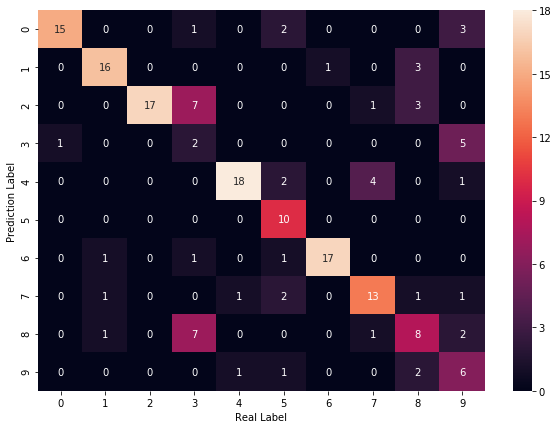

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:2 index:[5 6] real:5
#1 min_error:1 index:[2] real:2
#2 min_error:2 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:3 index:[1 6] real:6
#7 min_error:1 index:[2] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:2 index:[5 7] real:7
#11 min_error:2 index:[7] real:4
#12 min_error:2 index:[1 6] real:6
#13 min_error:3 index:[2 8 9] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:2 index:[2 8] real:3
#16 min_error:1 index:[8] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:3 index:[2 8 9] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:2 index:[1] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:2 index:[2] real:3
#23 min_error:1 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:1 index:[0] real:0
#26 min_error:1 index:[4] real:5
#27 min_error:2 index:[2] real:3
#28 min_error:1 index:[6] real:6
#29 min_error:1 index:[3] real:9
#3

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7371675943104514
Avg Base Learner:0.851948051948052


In [20]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07222222222222222
Accuracy on training set: 0.12777777777777777
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.40555555555555556
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6388888888888888


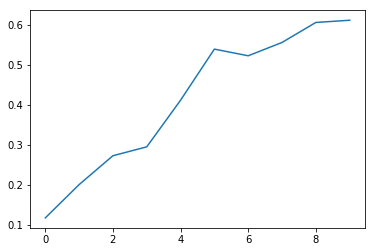

In [17]:
plt.plot(range(10),list_acc)
plt.show()

In [21]:
list_acc

[0.07222222222222222,
 0.12777777777777777,
 0.2777777777777778,
 0.2777777777777778,
 0.40555555555555556,
 0.5111111111111111,
 0.5166666666666667,
 0.5444444444444444,
 0.5833333333333334,
 0.6111111111111112,
 0.6388888888888888]